## Contents

### JSON Configuring

### Histograph Plotting

### Choropleth Plotting

# 6.3 Geographical Visualization Airbnb

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# prompts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
# Import ".json" file for Amsterdam

country_geo = r'C:/Users/bbissonette/Documents/Data Analytics Course/Acheivement 6/Scripts/neighbourhoods.geojson'

In [4]:
f = open(r'C:/Users/bbissonette/Documents/Data Analytics Course/Acheivement 6/Scripts/neighbourhoods.geojson',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[4.991669, 52.324436, 0], [4.991755, 52.324289, 0], [4.991828, 52.324175, 0], [4.991894, 52.324077, 0], [4.991952, 52.323996, 0], [4.992036, 52.32387, 0], [4.992109, 52.323767, 0], [4.99217, 52.323706, 0], [4.992597, 52.323135, 0], [4.993457, 52.32195, 0], [4.994212, 52.321029, 0], [4.99435, 52.320829, 0], [4.994392, 52.320774, 0], [4.994406, 52.32076, 0], [4.994621, 52.320511, 0], [4.994821, 52.320267, 0], [4.994833, 52.320241, 0], [4.994884, 52.320184, 0], [4.995243, 52.319674, 0], [4.99541, 52.319446, 0], [4.995604, 52.31921, 0], [4.995819, 52.318968, 0], [4.996035, 52.318706, 0], [4.99612, 52.318579, 0], [4.996189, 52.318501, 0], [4.996431, 52.318201, 0], [4.996455, 52.318169, 0], [4.996719, 52.317849, 0], [4.996734, 52.317824, 0], [4.996914, 52.317652, 0], [4.996334, 52.317348, 0], [4.995533, 52.316932, 0], [4.995051, 52.31669, 0], [4.994432, 52.316389, 0], [4.994223, 52.316289, 0], [4.993805, 52.316093, 0]

In [5]:
# Making Path do data as a string
path = r'C:\Users\bbissonette\Documents\Data Analytics Course\Acheivement 6'

In [6]:
# Importing Fluid_Lab_Invoicing_Raw data
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'listings_clean.csv'), index_col = False)

In [7]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,host_total_listings_count,property_type,accommodates,bathrooms,bedrooms,beds,guests_included,review_scores_rating
0,0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,...,1,44,1.0,Apartment,2,1.5,1.0,2.0,1,97.0
1,1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,...,1,47,1.0,Apartment,5,1.0,2.0,2.0,2,96.0
2,2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,...,2,198,2.0,Townhouse,2,1.0,1.0,1.0,2,87.0
3,3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,...,2,141,2.0,Apartment,3,1.0,1.0,1.0,2,100.0
4,4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,...,1,199,1.0,Houseboat,2,1.0,1.0,1.0,1,99.0


In [8]:
df_2 = df.drop(columns = ['Unnamed: 0'])

In [9]:
df_2.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,calculated_host_listings_count,availability_365,host_total_listings_count,property_type,accommodates,bathrooms,bedrooms,beds,guests_included,review_scores_rating
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,...,1,44,1.0,Apartment,2,1.5,1.0,2.0,1,97.0
1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,...,1,47,1.0,Apartment,5,1.0,2.0,2.0,2,96.0
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,...,2,198,2.0,Townhouse,2,1.0,1.0,1.0,2,87.0
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,...,2,141,2.0,Apartment,3,1.0,1.0,1.0,2,100.0
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,...,1,199,1.0,Houseboat,2,1.0,1.0,1.0,1,99.0


In [10]:
df_2.shape

(19988, 21)

<Axes: xlabel='price', ylabel='Count'>

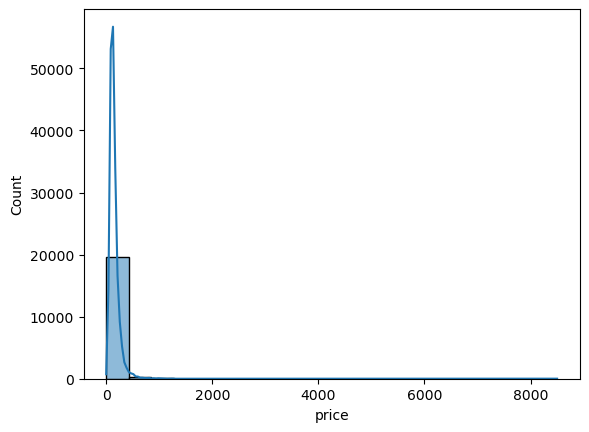

In [11]:
sns.histplot(df_2['price'], bins=20, kde = True) # shows extreme values for 'price'

<Axes: xlabel='accommodates', ylabel='Count'>

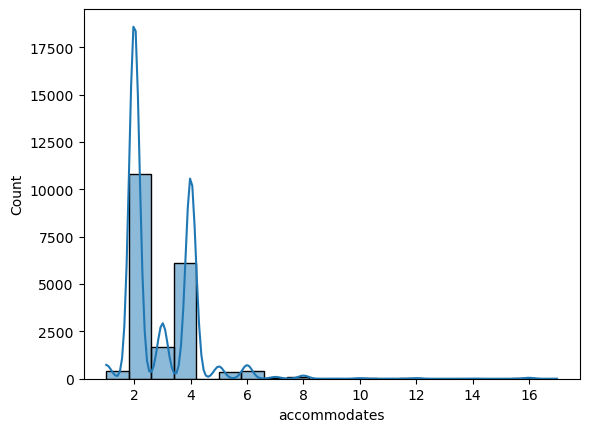

In [12]:
sns.histplot(df_2['accommodates'], bins=20, kde = True) # shows extreme values for 'price'

<Axes: xlabel='review_scores_rating', ylabel='Count'>

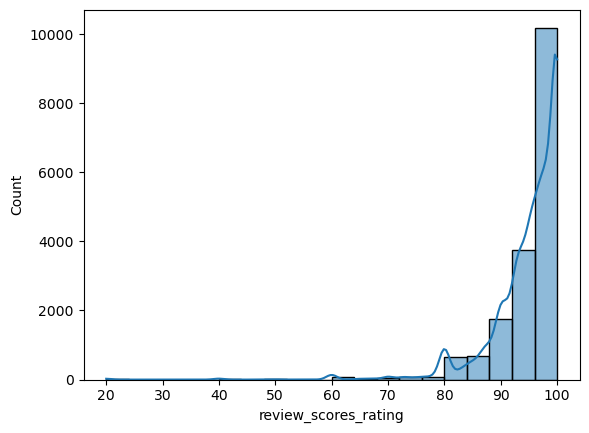

In [13]:
sns.histplot(df_2['review_scores_rating'], bins=20, kde = True) # shows extreme values for 'price'

## Plotting Choropleth

In [14]:
# Create a data frame with just the neighbourhoods and the prices we want plotted

data_to_plot = df_2[['neighbourhood','price']]
data_to_plot.head()

,neighbourhood,price
0,Oostelijk Havengebied - Indische Buurt,59
1,Westerpark,160
2,Centrum-Oost,80
3,Centrum-West,125
4,Centrum-West,150


In [20]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['neighbourhood', 'price'],
    key_on = 'feature.properties.neighbourhood', 
    fill_color = 'Blues', fill_opacity=0.75, line_opacity=0.1,
    legend_name = "Pricing").add_to(map)
folium.LayerControl().add_to(map)

map

In [22]:
map.save('pricing_plot_data.png')

1. Yes this analysis show the highest price neighborhoods to stay in an airbnb, doesn't answer which is the best area to stay but does show what neighbourhoods to stay if you have certain budget price ranges.
2. This does lead me to ask whether certain neighbour hoods that have higher pricing has higher reviews, or if the price doesnt reflect the review rating score.